In [1]:
!pip install pandas scikit-learn nltk gdown

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Descargar recursos necesarios para NLTK
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
file_path_clasificadas = 'https://docs.google.com/spreadsheets/d/1PKIzLMiZUqQmGXr3E-5tzrVb1Smw3lBK/export?format=csv&id=1PKIzLMiZUqQmGXr3E-5tzrVb1Smw3lBK'
noticias_clasificadas = pd.read_csv(file_path_clasificadas)

# Eliminar filas con valores nulos
noticias_clasificadas.dropna(subset=['Títulos', 'Temas'], inplace=True)

# Separar columnas de texto y categorías
X = noticias_clasificadas['Títulos']
y = noticias_clasificadas['Temas']

In [3]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline y entrenar el modelo
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Evaluar el modelo inicial
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8125
Classification Report:
                         precision    recall  f1-score   support

Condiciones de trabajo       0.00      0.00      0.00         3
     Delito-Judiciales       0.00      0.00      0.00         4
     Medidas de fuerza       0.79      1.00      0.88        91
            Paritarias       1.00      0.68      0.81        19
    Sobre sindicalista       0.00      0.00      0.00         2
         Vida sindical       0.00      0.00      0.00         9

              accuracy                           0.81       128
             macro avg       0.30      0.28      0.28       128
          weighted avg       0.71      0.81      0.75       128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
# Cargar archivo con múltiples columnas
file_path_nuevo = 'https://docs.google.com/spreadsheets/d/1Uuo75-ao9fViF0J3JUdPZSEwTFgWoH4JoIouffrp1HQ/export?format=csv&id=1Uuo75-ao9fViF0J3JUdPZSEwTFgWoH4JoIouffrp1HQ'
df_nuevo = pd.read_csv(file_path_nuevo)

# Verificar las columnas del archivo
print(df_nuevo.columns)

# Eliminar filas con valores nulos en la columna "titulos"
df_nuevo.dropna(subset=['titulos'], inplace=True)

# Realizar predicciones utilizando el pipeline completo
df_nuevo['temas'] = model.predict(df_nuevo['titulos'])

# Guardar el archivo con los temas asignados
df_nuevo.to_csv('noticias_con_temas.csv', index=False)
print("Archivo con temas asignados guardado como 'noticias_con_temas.csv'")

# Cargar el archivo CSV con los temas asignados
df_temas = pd.read_csv('noticias_con_temas.csv')

# Contar la cantidad de cada tema en la columna 'temas'
conteo_temas = df_temas['temas'].value_counts()

# Imprimir el conteo de temas
print("\nConteo de temas en las noticias corregidas:")
print(conteo_temas)

Index(['titulos', 'enlaces', 'texto_noticia', 'contiene_palabra_clave',
       'nombres_propios'],
      dtype='object')
Archivo con temas asignados guardado como 'noticias_con_temas.csv'

Conteo de temas en las noticias corregidas:
temas
Medidas de fuerza    163
Paritarias             5
Name: count, dtype: int64


<ipython-input-5-3a4aa4b6eee5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_temas.index, y=conteo_temas.values, palette='viridis')


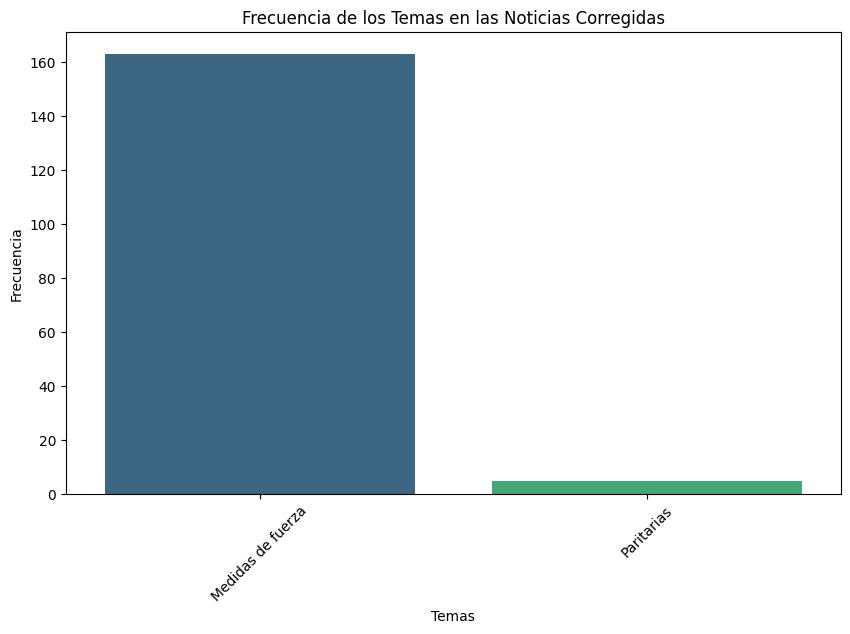

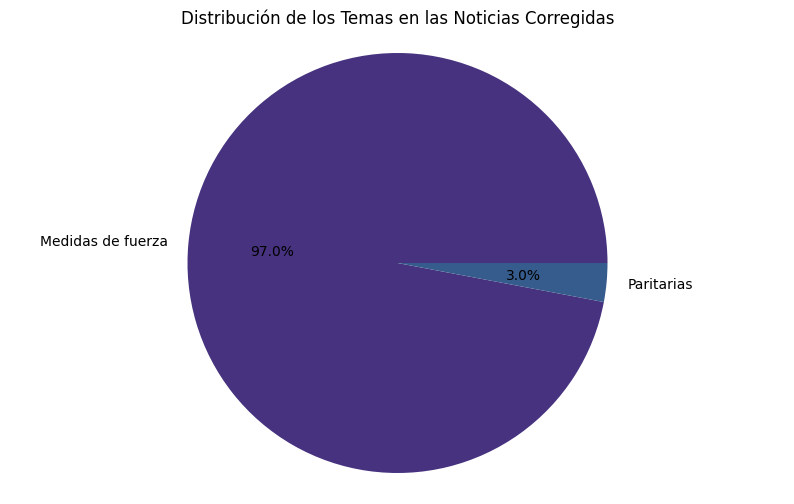

In [5]:
# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=conteo_temas.index, y=conteo_temas.values, palette='viridis')
plt.title('Frecuencia de los Temas en las Noticias Corregidas')
plt.xlabel('Temas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor legibilidad

plt.savefig('grafico_barras.png', bbox_inches='tight')

plt.show()

# Crear gráfico de torta
plt.figure(figsize=(10, 6))
plt.pie(conteo_temas.values, labels=conteo_temas.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Distribución de los Temas en las Noticias Corregidas')
plt.axis('equal')  # Para asegurar que el gráfico de torta sea circular

# Guardar el gráfico de torta
plt.savefig('grafico_torta.png', bbox_inches='tight')
plt.show()

In [7]:
#Descargar los archivos
#Para poder revisar los resultados y corregirlos en caso de corresponder, se descargan los archivos al entorno local.

In [8]:
import os
from google.colab import files

# Ruta donde guardamos los archivos ("/content/")
carpeta_destino = '/content/'

# Buscar todos los archivos CSV y PNG en la carpeta de destino
archivos_a_descargar = [f for f in os.listdir(carpeta_destino) if f.endswith('.csv') or f.endswith('.png')]

# Descargar todos los archivos encontrados
for archivo in archivos_a_descargar:
    archivo_path = os.path.join(carpeta_destino, archivo)
    files.download(archivo_path)  # Descarga el archivo automáticamente
    print(f'Descargando: {archivo}')  # Mensaje

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: grafico_torta.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: noticias_con_temas.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descargando: grafico_barras.png
